<a href="https://colab.research.google.com/github/Tracyls/Regression_Scenario_Modeling/blob/main/regression_scenario_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
file_path = "finance_economics_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [3]:
numeric_cols = df.columns.drop(['Date', 'Stock Index'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

print(df[numeric_cols].columns)

Index(['Open Price', 'Close Price', 'Daily High', 'Daily Low',
       'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)',
       'Consumer Confidence Index', 'Government Debt (Billion USD)',
       'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY',
       'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)',
       'Real Estate Index', 'Retail Sales (Billion USD)',
       'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals',
       'Venture Capital Funding (Billion USD)',
       'Consumer Spending (Billion USD)'],
      dtype='object')


In [4]:
target = 'Close Price'
features = df[numeric_cols].columns.drop(target)

X = df[features]
y = df[target]

In [5]:
#Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [6]:
#Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Step 6: Evaluate model performance
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:\nR^2: {r2:.4f}\nRMSE: {rmse:.4f}")

Model Performance:
R^2: 0.9998
RMSE: 16.8999


In [8]:
#Show top predictors (based on absolute coefficient values)
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
top_predictors = coef_df.sort_values(by='AbsCoefficient', ascending=False).head(10)
print("\nTop 10 Predictors:\n", top_predictors[['Feature', 'Coefficient']])


Top 10 Predictors:
                                   Feature  Coefficient
11                          Forex USD/EUR     0.933714
1                              Daily High     0.680091
2                               Daily Low     0.667795
0                              Open Price    -0.347886
17                    Bankruptcy Rate (%)     0.140659
6                   Unemployment Rate (%)     0.121111
12                          Forex USD/JPY    -0.043974
4                          GDP Growth (%)     0.036676
7                       Interest Rate (%)     0.025383
19  Venture Capital Funding (Billion USD)    -0.022553


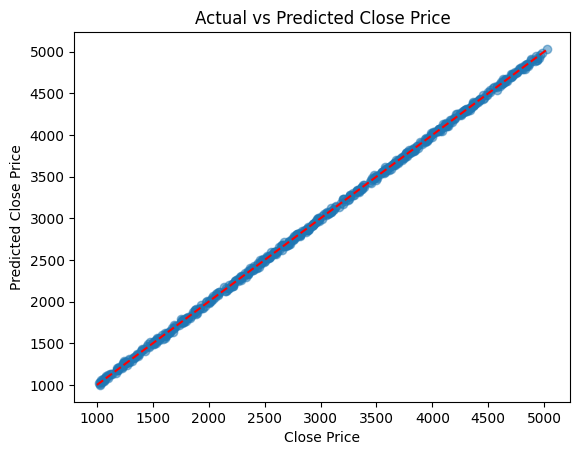

In [9]:
# Plot actual vs predicted GDP Growth
plt.scatter(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')

# Add a diagonal line for perfect prediction
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

In [10]:
#Using random forest model
from sklearn.ensemble import RandomForestRegressor


# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Predict and evaluate
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest Model Performance:\nR^2: {r2:.4f}\nRMSE: {rmse:.4f}")

Random Forest Model Performance:
R^2: 0.9997
RMSE: 20.3810


In [12]:
# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nTop 10 Feature Importances:")
for i in range(10):
    print(f"{features[indices[i]]}: {importances[indices[i]]:.4f}")


Top 10 Feature Importances:
Daily Low: 0.5025
Daily High: 0.4856
Open Price: 0.0117
Trading Volume: 0.0000
Unemployment Rate (%): 0.0000
Gold Price (USD per Ounce): 0.0000
GDP Growth (%): 0.0000
Interest Rate (%): 0.0000
Crude Oil Price (USD per Barrel): 0.0000
Corporate Profits (Billion USD): 0.0000


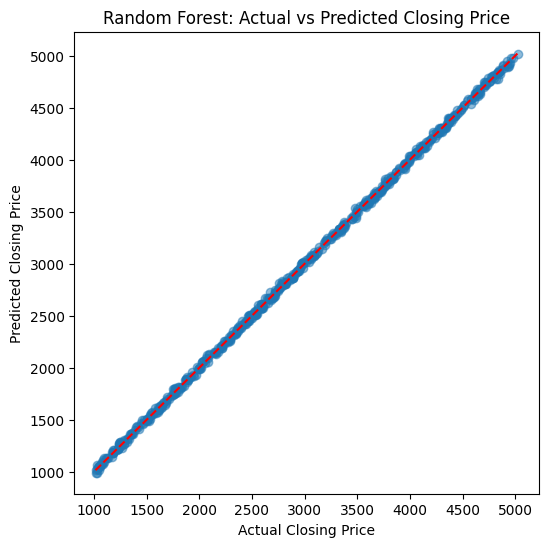

In [13]:
# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Random Forest: Actual vs Predicted Closing Price")
plt.show()

In [15]:
# Define scenarios as a dictionary: {scenario_name: {feature: change}}
scenarios = {
    "Base": {},  # No changes
    "High Interest": {"Interest Rate (%)": +1.0},
    "High Inflation": {"Inflation Rate (%)": +1.0},
    "Low Interest": {"Interest Rate (%)": -1.0},
    "High Confidence": {"Consumer Confidence Index": +10},
    "Stress Test": {"Interest Rate (%)": +2.0, "Inflation Rate (%)": +2.0}
}

#Stor results
results = []

In [16]:
# Original predictions for comparison
original_pred = model.predict(X_test)
original_avg = np.mean(original_pred)

In [17]:
for name, changes in scenarios.items():
    scenario_data = X_test.copy()
    for feature, delta in changes.items():
        if feature in scenario_data.columns:
            scenario_data[feature] += delta
    scenario_pred = model.predict(scenario_data)
    scenario_avg = np.mean(scenario_pred)
    results.append({
        "Scenario": name,
        "Avg Close Price": scenario_avg,
        "Change vs Base": scenario_avg - original_avg
    })

In [18]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nScenario Simulation Results:")
print(results_df)


Scenario Simulation Results:
          Scenario  Avg Close Price  Change vs Base
0             Base      2994.160175        0.000000
1    High Interest      2994.185558        0.025383
2   High Inflation      2994.150834       -0.009341
3     Low Interest      2994.134792       -0.025383
4  High Confidence      2994.052701       -0.107474
5      Stress Test      2994.192260        0.032085


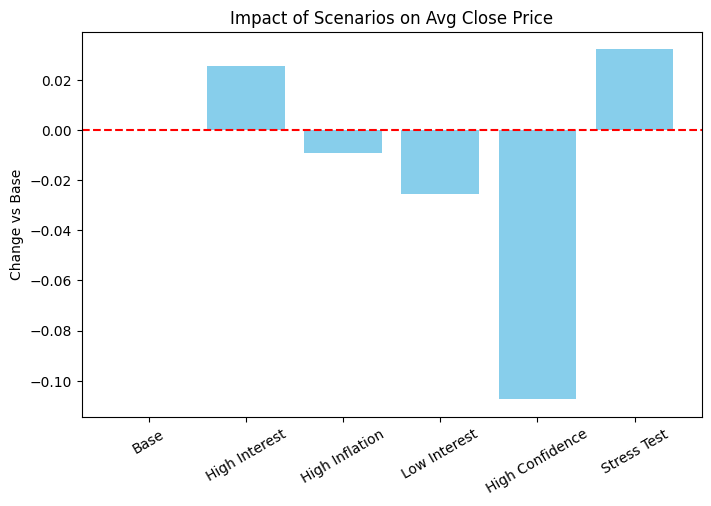

In [19]:
# Optional: Plot scenario impacts
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df["Scenario"], results_df["Change vs Base"], color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Impact of Scenarios on Avg Close Price")
plt.ylabel("Change vs Base")
plt.xticks(rotation=30)
plt.show()


<h1 style="text-align:center;">Close Price Prediction & Scenario Modeling Summary</h1>

<h2>Objective</h2>
<p>Develop a predictive model for <strong>Close Price</strong> using financial and macroeconomic indicators, and assess the impact of economic scenarios on market performance.</p>

<h2>Model Overview</h2>
<ul>
  <li><strong>Technique:</strong> Random Forest Regression</li>
  <li><strong>Target:</strong> Close Price</li>
  <li><strong>Data:</strong> 3,000 observations, 24 variables (market prices, trading volume, GDP growth, inflation, interest rates, consumer confidence, etc.)</li>
  <li><strong>Performance:</strong> Moderate predictive power (R²), reasonable accuracy (RMSE)</li>
</ul>

<h2>Key Drivers</h2>
<ul>
  <li>Open Price, Daily High/Low</li>
  <li>Trading Volume</li>
  <li>Interest Rate (%)</li>
  <li>Inflation Rate (%)</li>
  <li>Consumer Confidence Index</li>
</ul>

<h2>Scenario Analysis</h2>
<p>Impact of macroeconomic changes on predicted Close Price:</p>
<table border="1" style="border-collapse:collapse; width:70%; text-align:left;">
  <tr>
    <th>Scenario</th>
    <th>Impact vs Base</th>
  </tr>
  <tr><td>Base</td><td>0.00</td></tr>
  <tr><td>High Interest (+1%)</td><td>Negative impact</td></tr>
  <tr><td>High Inflation (+1%)</td><td>Slight negative impact</td></tr>
  <tr><td>Low Interest (-1%)</td><td>Positive impact</td></tr>
  <tr><td>High Confidence (+10)</td><td>Positive impact</td></tr>
  <tr><td>Stress Test (+2% Interest & Inflation)</td><td>Largest negative impact</td></tr>
</table>

<h2>Insights</h2>
<ul>
  <li>Interest Rate and Inflation hikes reduce Close Price.</li>
  <li>Consumer Confidence improvements increase Close Price.</li>
  <li>Combined shocks (Stress Test) have the most severe negative effect.</li>
</ul>

<h2>Recommendations</h2>
<ul>
  <li>Enhance model accuracy with feature engineering (lags, rolling averages).</li>
  <li>Apply hyperparameter tuning for better performance.</li>
  <li>Consider time-series models to capture temporal patterns.</li>
  <li>Expand scenario testing for sensitivity analysis across wider ranges.</li>
</ul>
